<a href="https://colab.research.google.com/github/sandbox259/Sales-Analysis/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# Load datasets
orders_df = pd.read_csv("/content/List_of_Orders_55FFC79CF8.csv")
order_details_df = pd.read_csv("/content/Order_Details_19795F61CF.csv")
sales_target_df = pd.read_csv("/content/Sales_target_DD2E9B96A0.csv")

In [ ]:
# Merge datasets on 'Order ID'
merged_df = pd.merge(order_details_df, orders_df, on="Order ID")
merged_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune


In [ ]:
# Total Sales per Category
total_sales = merged_df.groupby("Category")["Amount"].sum().reset_index()
total_sales.head()

,Category,Amount
0,Clothing,139054.0
1,Electronics,165267.0
2,Furniture,127181.0


In [ ]:
# Average Profit per Order and Profit Margin
profit_analysis = merged_df.groupby("Category").agg({"Profit": ["sum", "mean"], "Amount": "sum"})
profit_analysis["Profit Margin"] = (profit_analysis.loc[:, ("Profit", "sum")] / profit_analysis.loc[:, ("Amount", "sum")]) * 100
profit_analysis = profit_analysis.reset_index()
profit_analysis.head()

Category   Profit               Amount Profit Margin
                    sum       mean       sum              
0     Clothing  11163.0  11.762908  139054.0      8.027817
1  Electronics  10494.0  34.071429  165267.0      6.349725
2    Furniture   2298.0   9.456790  127181.0      1.806874

In [ ]:
# Identify top-performing and underperforming categories
top_category = profit_analysis.sort_values(by=("Profit", "sum"), ascending=False).iloc[0]
underperforming_category = profit_analysis.sort_values(by=("Profit", "sum"), ascending=True).iloc[0]
print("\nTop Performing Category:\n", top_category)
print("\nUnderperforming Category:\n", underperforming_category)




Top Performing Category:
 Category                Clothing
Profit         sum       11163.0
               mean    11.762908
Amount         sum      139054.0
Profit Margin           8.027817
Name: 0, dtype: object

Underperforming Category:
 Category               Furniture
Profit         sum        2298.0
               mean      9.45679
Amount         sum      127181.0
Profit Margin           1.806874
Name: 2, dtype: object


In [ ]:
# Calculate Month-over-Month Percentage Change in Furniture Sales Target
sales_target_df["Previous Target"] = sales_target_df[sales_target_df["Category"] == "Furniture"]["Target"].shift(1)
sales_target_df["Percentage Change"] = ((sales_target_df["Target"] - sales_target_df["Previous Target"]) / sales_target_df["Previous Target"]) * 100


In [ ]:
# Identify significant fluctuations
significant_fluctuations = sales_target_df[sales_target_df["Percentage Change"].abs() > 5]  # Assuming >5% is significant
print("\nSignificant Target Fluctuations:\n", significant_fluctuations)


Significant Target Fluctuations:
 Empty DataFrame
Columns: [Month of Order Date, Category, Target, Previous Target, Percentage Change]
Index: []


In [ ]:
# Top 5 states with highest order count
top_states = orders_df["State"].value_counts().head(5)
print("\nTop 5 States by Order Count:\n", top_states)


Top 5 States by Order Count:
 State
Madhya Pradesh    101
Maharashtra        90
Rajasthan          32
Gujarat            27
Punjab             25
Name: count, dtype: int64


In [ ]:
# Total Sales and Average Profit per Top State
top_states_sales_profit = merged_df[merged_df["State"].isin(top_states.index)].groupby("State").agg({"Amount": "sum", "Profit": "mean"}).reset_index()
print("\nSales and Profit for Top 5 States:\n", top_states_sales_profit)


Sales and Profit for Top 5 States:
             State    Amount     Profit
0         Gujarat   21058.0   5.344828
1  Madhya Pradesh  105140.0  16.326471
2     Maharashtra   95348.0  21.296552
3          Punjab   16786.0 -10.150000
4       Rajasthan   21149.0  16.986486


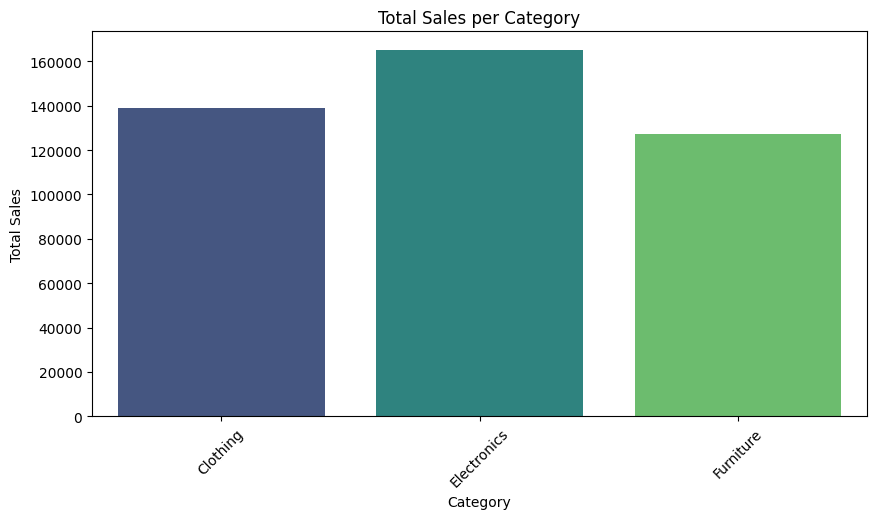

In [ ]:
# Sales per Category
plt.figure(figsize=(10, 5))
sns.barplot(x="Category", y="Amount", data=total_sales, hue="Category", palette="viridis", legend=False)
plt.title("Total Sales per Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

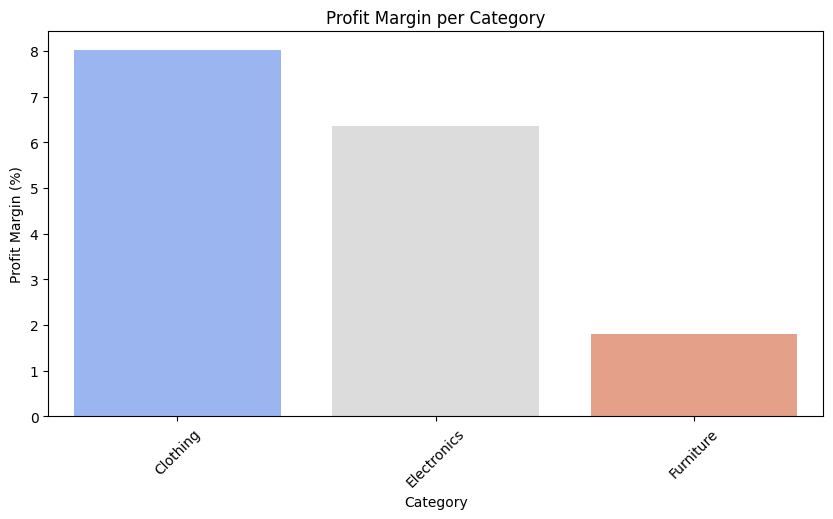

In [ ]:
# Profit Margin per Category
plt.figure(figsize=(10, 5))
sns.barplot(x="Category", y="Profit Margin", data=profit_analysis, hue="Category", palette="coolwarm", legend = False)
plt.title("Profit Margin per Category")
plt.xlabel("Category")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=45)
plt.show()

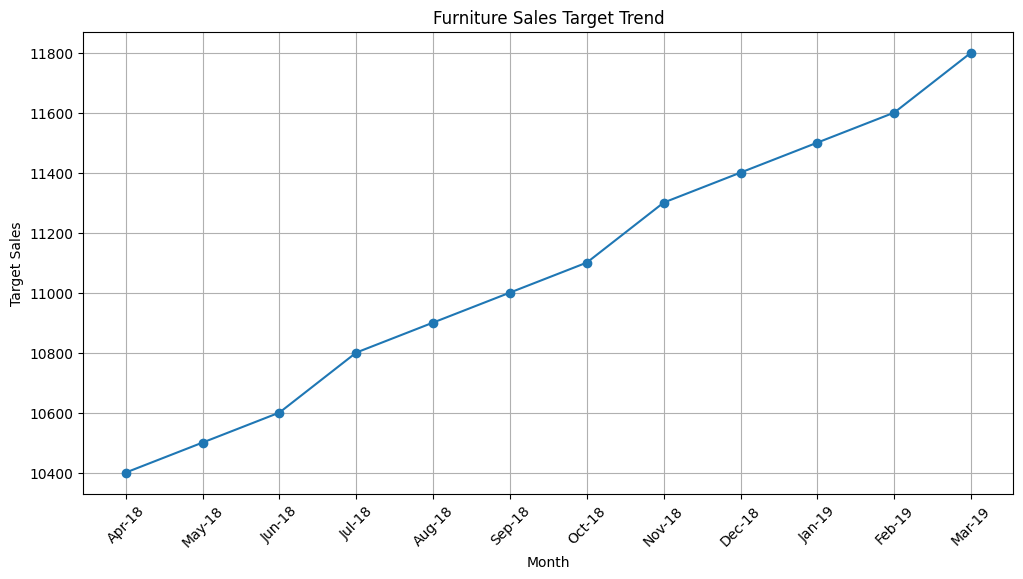

In [ ]:
# Target Sales Trend for Furniture
plt.figure(figsize=(12, 6))
plt.plot(sales_target_df[sales_target_df["Category"] == "Furniture"]["Month of Order Date"], sales_target_df[sales_target_df["Category"] == "Furniture"]["Target"], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title("Furniture Sales Target Trend")
plt.xlabel("Month")
plt.ylabel("Target Sales")
plt.grid()
plt.show()

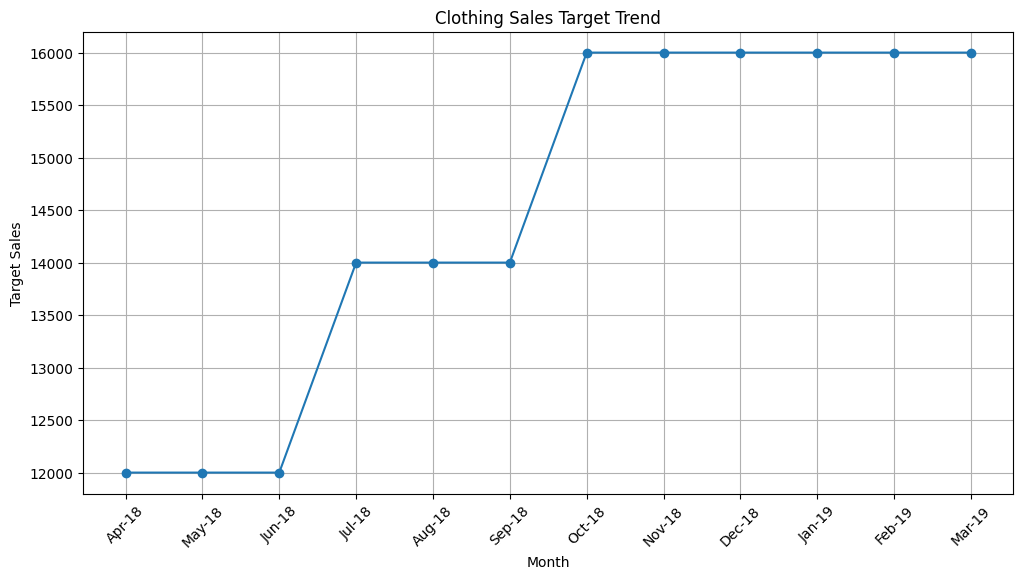

In [ ]:
# Target Sales Trend for Clothing
plt.figure(figsize=(12, 6))
plt.plot(sales_target_df[sales_target_df["Category"] == "Clothing"]["Month of Order Date"], sales_target_df[sales_target_df["Category"] == "Clothing"]["Target"], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title("Clothing Sales Target Trend")
plt.xlabel("Month")
plt.ylabel("Target Sales")
plt.grid()
plt.show()

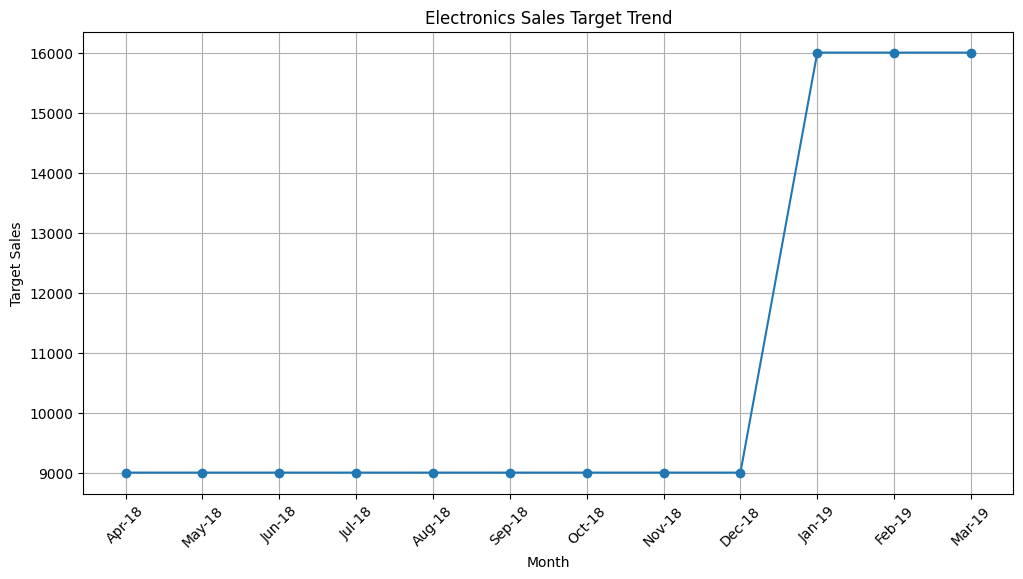

In [ ]:
# Target Sales Trend for Electronics
plt.figure(figsize=(12, 6))
plt.plot(sales_target_df[sales_target_df["Category"] == "Electronics"]["Month of Order Date"], sales_target_df[sales_target_df["Category"] == "Electronics"]["Target"], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title("Electronics Sales Target Trend")
plt.xlabel("Month")
plt.ylabel("Target Sales")
plt.grid()
plt.show()

In [ ]:
furniture_sales = merged_df[merged_df["Category"] == "Furniture"].groupby("Order Date")["Amount"].sum().reset_index()
furniture_sales.columns = ['ds', 'y']
# Convert date strings to datetime objects (assuming format 'dd-mm-yyyy')
furniture_sales['ds'] = pd.to_datetime(furniture_sales['ds'], format='%d-%m-%Y')
furniture_sales = furniture_sales.sort_values("ds")
print("\nFurniture Sales Data for Forecasting:\n", furniture_sales.head())


Furniture Sales Data for Forecasting:
            ds       y
2  2018-04-01  1275.0
12 2018-04-03    24.0
36 2018-04-08  1840.0
44 2018-04-09    30.0
58 2018-04-12   259.0


In [ ]:
model = Prophet()
model.fit(furniture_sales)
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)
print("\nForecasted Sales Data (first 5 rows):\n", forecast.head())


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzsrxfq28/gz1xnvhr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzsrxfq28/8y0lc6xl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40035', 'data', 'file=/tmp/tmpzsrxfq28/gz1xnvhr.json', 'init=/tmp/tmpzsrxfq28/8y0lc6xl.json', 'output', 'file=/tmp/tmpzsrxfq28/prophet_modely8nuxgta/prophet_model-20250228175028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Forecasted Sales Data (first 5 rows):
           ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2018-04-01  460.666550  -421.506745  1966.244914   460.666550   460.666550   
1 2018-04-03  464.603726 -1102.277873  1476.968308   464.603726   464.603726   
2 2018-04-08  474.446665  -418.526067  1991.452330   474.446665   474.446665   
3 2018-04-09  476.415253  -441.861638  1963.817848   476.415253   476.415253   
4 2018-04-12  482.321017 -1016.436110  1554.228206   482.321017   482.321017   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0      304.497614            304.497614            304.497614  304.497614   
1     -321.115868           -321.115868           -321.115868 -321.115868   
2      304.497614            304.497614            304.497614  304.497614   
3      325.316308            325.316308            325.316308  325.316308   
4     -145.279366           -145.279366           -145.279366 -145.279366   

   weekly_lower 

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


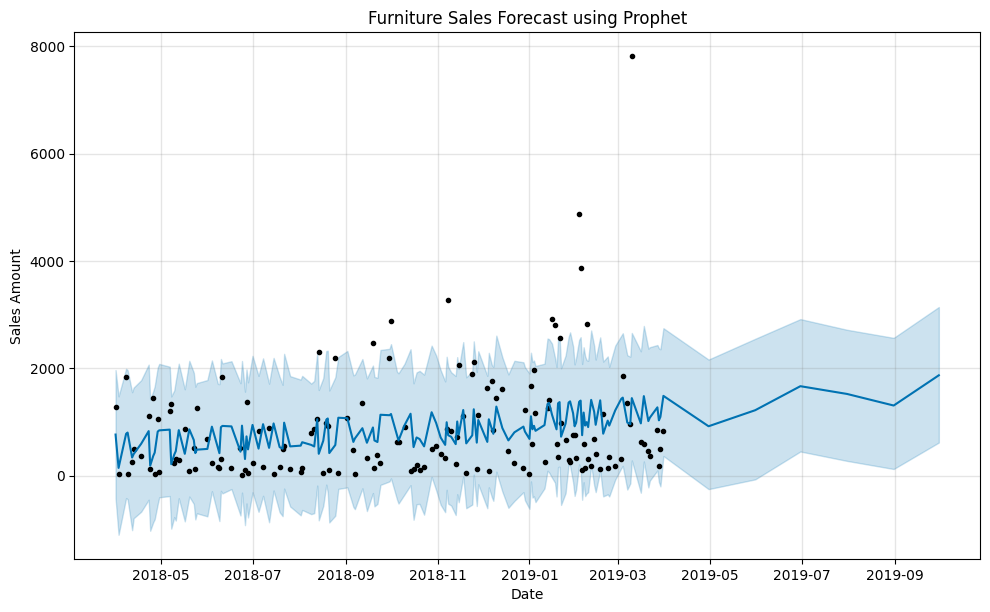

In [ ]:
fig1 = model.plot(forecast)
plt.title("Furniture Sales Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.show()

In [ ]:
customer_data = merged_df.groupby("CustomerName").agg({
    "Amount": "sum",
    "Profit": "sum",
    "Order ID": "nunique"
}).reset_index()
customer_data.rename(columns={"Order ID": "Order Count"}, inplace=True)
print("\nCustomer Segmentation Data (first 5 rows):\n", customer_data.head())


Customer Segmentation Data (first 5 rows):
   CustomerName  Amount  Profit  Order Count
0    Aakanksha    74.0   -18.0            1
1      Aarushi  4701.0 -1669.0            3
2       Aashna  1931.0   376.0            1
3       Aastha  3276.0   873.0            1
4       Aayush   556.0   -38.0            1



Customer Segmentation Data with Clusters (first 5 rows):
   CustomerName  Amount  Profit  Order Count  Cluster
0    Aakanksha    74.0   -18.0            1        0
1      Aarushi  4701.0 -1669.0            3        1
2       Aashna  1931.0   376.0            1        0
3       Aastha  3276.0   873.0            1        2
4       Aayush   556.0   -38.0            1        0


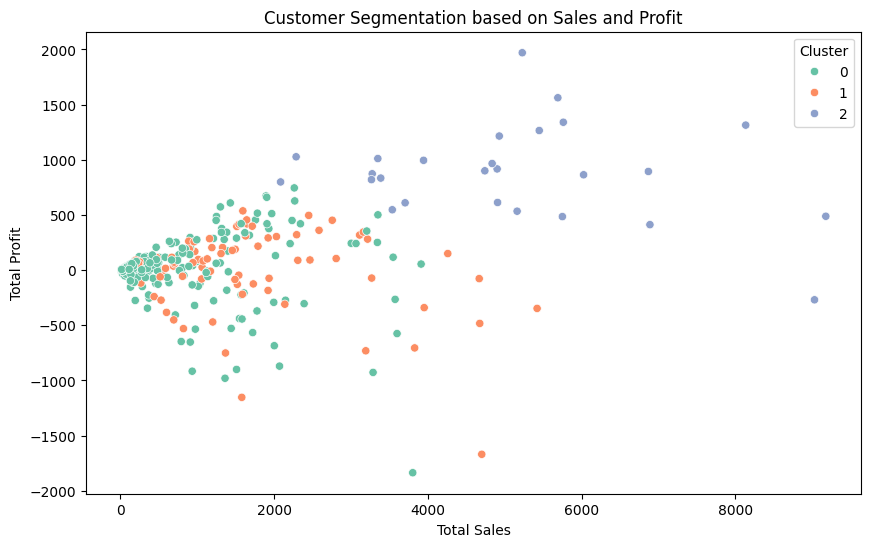

In [ ]:
scaler = StandardScaler()
features = scaler.fit_transform(customer_data[["Amount", "Profit", "Order Count"]])
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(features)
print("\nCustomer Segmentation Data with Clusters (first 5 rows):\n", customer_data.head())

# Visualize customer clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x="Amount", y="Profit", hue="Cluster", data=customer_data, palette="Set2")
plt.title("Customer Segmentation based on Sales and Profit")
plt.xlabel("Total Sales")
plt.ylabel("Total Profit")
plt.show()

In [ ]:
# Display results
print("Total Sales per Category:\n", total_sales)
print("\nSales Profitability Analysis:\n", profit_analysis)
print("\nTop Performing Category:\n", top_category)
print("\nUnderperforming Category:\n", underperforming_category)
print("\nSignificant Target Fluctuations:\n", significant_fluctuations)
print("\nTop 5 States by Order Count:\n", top_states)
print("\nSales and Profit for Top 5 States:\n", top_states_sales_profit)

Total Sales per Category:
       Category    Amount
0     Clothing  139054.0
1  Electronics  165267.0
2    Furniture  127181.0

Sales Profitability Analysis:
       Category   Profit               Amount Profit Margin
                    sum       mean       sum              
0     Clothing  11163.0  11.762908  139054.0      8.027817
1  Electronics  10494.0  34.071429  165267.0      6.349725
2    Furniture   2298.0   9.456790  127181.0      1.806874

Top Performing Category:
 Category                Clothing
Profit         sum       11163.0
               mean    11.762908
Amount         sum      139054.0
Profit Margin           8.027817
Name: 0, dtype: object

Underperforming Category:
 Category               Furniture
Profit         sum        2298.0
               mean      9.45679
Amount         sum      127181.0
Profit Margin           1.806874
Name: 2, dtype: object

Significant Target Fluctuations:
 Empty DataFrame
Columns: [Month of Order Date, Category, Target, Previous Target

In [ ]:
# Create a basket of products per order (one-hot encoding)
basket = order_details_df.pivot_table(index="Order ID", columns="Sub-Category", values="Quantity", aggfunc="sum", fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Generate frequent itemsets using Apriori with minimum support of 0.1
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

# Generate association rules with a minimum lift of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by="lift", ascending=False)

<ipython-input-24-b61652ff24ab>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
print("\nTop Association Rules:")
print(rules.head())


Top Association Rules:
     antecedents    consequents  support  confidence     lift
0  (Hankerchief)        (Stole)    0.118    0.427536  1.36158
1        (Stole)  (Hankerchief)    0.118    0.375796  1.36158
2        (Saree)        (Stole)    0.116    0.371795  1.18406
3        (Stole)        (Saree)    0.116    0.369427  1.18406
